In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import cv2

In [ ]:
# np_array_u = np.load("/content/3311.npy")
# np_array_l = np.load("/content/L3315.npy")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# np_array_u

In [ ]:
# np_array_u.shape

In [ ]:
# plt.imshow(np_array_u.reshape(409,-1))

In [3]:
path="/content/drive/MyDrive/waveform"

In [ ]:
# plt.plot(np_array_u)
# plt.plot(np_array_l)

In [15]:
[200,409,1]

[200, 409, 1]

In [4]:
path = r"/content/drive/MyDrive/waveform"

In [5]:
unlensed_waveform = glob.glob(path+"/*.npy")

In [6]:
lensed_waveform = []  # Initialize lists to store filenames
unlensed_waveform = []

for i in glob.glob(path + "/L*.npy"):
    lensed_waveform.append(i)

for i in glob.glob(path + "/*.npy"):
    if not any(i == lwf for lwf in lensed_waveform):
        unlensed_waveform.append(i)



In [7]:
len(lensed_waveform)


4789

In [8]:
len(unlensed_waveform)

4781

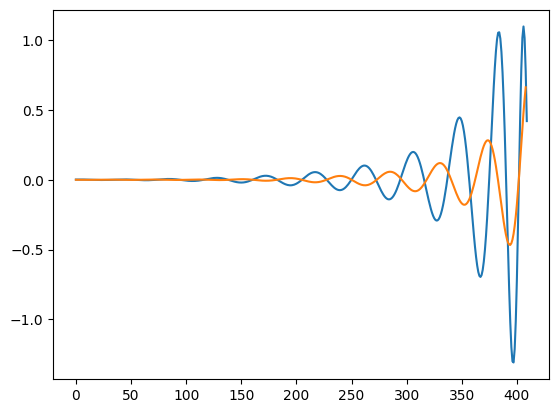

In [9]:
type(lensed_waveform)
plt.plot(np.load(lensed_waveform[9]))
plt.plot(np.load(unlensed_waveform[9]))


In [10]:
lensed_waveform = [np.load(file) for file in lensed_waveform]
unlensed_waveform = [np.load(file) for file in unlensed_waveform]

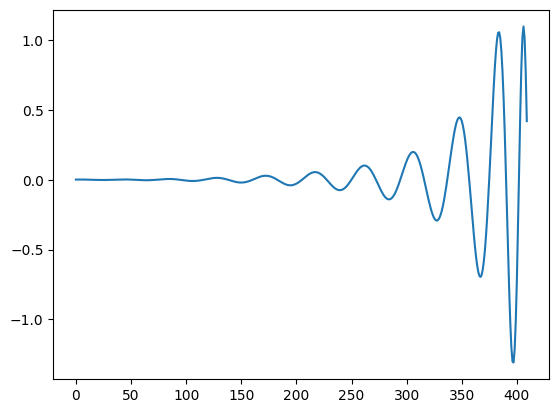

<Figure size 40900x100 with 0 Axes>

In [11]:
plt.plot(lensed_waveform[9])
plt.figure(figsize=(409, 1))
plt.savefig('plot.png')
plt.show()


In [12]:
desired_shape = (409, 1)
lensed_waveform = [np.resize(waveform, desired_shape) for waveform in lensed_waveform]
unlensed_waveform = [np.resize(waveform, desired_shape) for waveform in unlensed_waveform]

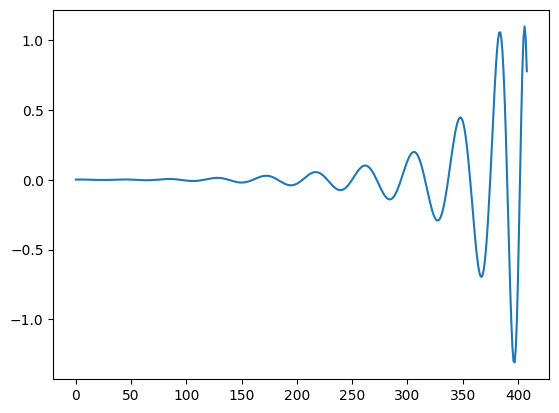

In [13]:
plt.plot(lensed_waveform[9])

In [14]:
(lensed_waveform[0].shape)

(409, 1)

In [15]:
# Created labels
lensed_labels = np.ones(len(lensed_waveform))
unlensed_labels = np.zeros(len(unlensed_waveform))


In [42]:
# Combine data and labels

from sklearn.model_selection import train_test_split
X = np.concatenate([lensed_waveform, unlensed_waveform])
y = np.concatenate([lensed_labels, unlensed_labels])

# Split data into training and testing sets
# from sklearn.model_selection import train_test_split

# Assuming your data is in X and y variables
# X represents the features, and y represents the target variable

# Split the data into training and testing sets (80% training, 20% test+validation)
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the test+validation set into test and validation sets (50% test, 50% validation)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)


In [43]:
y_train.shape

(7656,)

In [46]:
y_val.shape
X_train.shape

(7656, 409, 1)

1.0


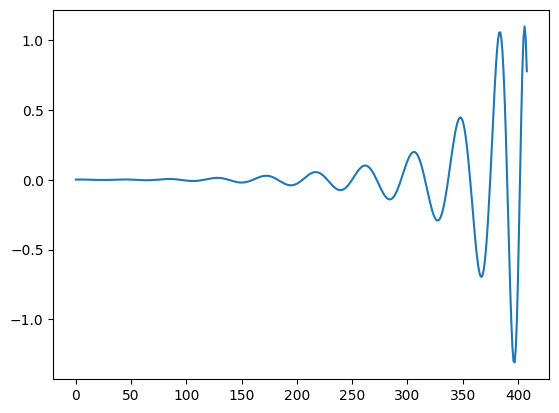

In [17]:
plt.plot(X[9])
print(y[9])

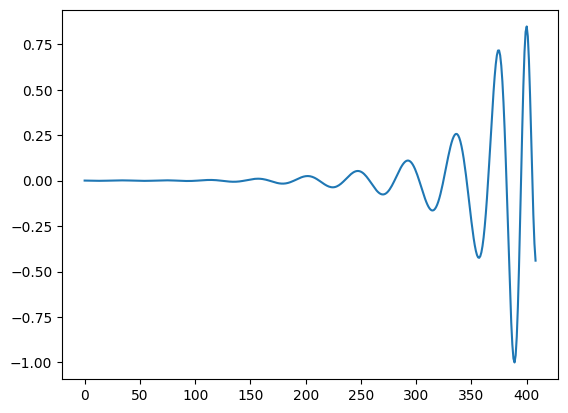

In [18]:
plt.plot(X_train[3])


In [19]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


In [20]:
model = MobileNetV2(weights='imagenet', include_top=False)  # Load the pre-trained model without the top classification layers


9406464/9406464 [==============================] - 0s 0us/step


In [22]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD

model = models.Sequential()


model.add(layers.Input(shape=(409, 1)))

model.add(layers.Conv1D(64, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Dropout(0.3))

model.add(layers.Conv1D(128, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Dropout(0.4))

model.add(layers.Conv1D(256, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

model.compile(optimizer=SGD(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

60/60 [==============================] - 8s 5ms/step - loss: 1.6237 - accuracy: 0.5167
Test accuracy: 0.5167189240455627


# **Test Accuracy: 80%**

In [47]:
from keras import models, layers
from keras.optimizers import SGD

# Assuming X_train, X_val, y_train, y_val, X_test, y_test are already defined

model = models.Sequential()
model.add(layers.Input(shape=(409, 1)))
model.add(layers.Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(7656,))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=SGD(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")


Epoch 1/10
240/240 [==============================] - 9s 22ms/step - loss: 0.6932 - accuracy: 0.5033 - val_loss: 0.6931 - val_accuracy: 0.5005
Epoch 2/10
240/240 [==============================] - 4s 16ms/step - loss: 0.6931 - accuracy: 0.5037 - val_loss: 0.6930 - val_accuracy: 0.5005
Epoch 3/10
240/240 [==============================] - 4s 16ms/step - loss: 0.6929 - accuracy: 0.5218 - val_loss: 0.6928 - val_accuracy: 0.5005
Epoch 4/10
240/240 [==============================] - 4s 16ms/step - loss: 0.6927 - accuracy: 0.5188 - val_loss: 0.6926 - val_accuracy: 0.5308
Epoch 5/10
240/240 [==============================] - 4s 18ms/step - loss: 0.6923 - accuracy: 0.5481 - val_loss: 0.6924 - val_accuracy: 0.4995
Epoch 6/10
240/240 [==============================] - 4s 16ms/step - loss: 0.6916 - accuracy: 0.5667 - val_loss: 0.6917 - val_accuracy: 0.5110
Epoch 7/10
240/240 [==============================] - 4s 16ms/step - loss: 0.6903 - accuracy: 0.5997 - val_loss: 0.6902 - val_accuracy: 0.5507

# **Test Accuracy: 88%**

In [35]:
model = models.Sequential()
model.add(layers.Input(shape=(409, 1)))
model.add(layers.Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(7656,))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.00001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/10
240/240 [==============================] - 8s 17ms/step - loss: 0.4958 - accuracy: 0.7291
Epoch 2/10
240/240 [==============================] - 4s 17ms/step - loss: 0.3350 - accuracy: 0.8403
Epoch 3/10
240/240 [==============================] - 4s 16ms/step - loss: 0.2977 - accuracy: 0.8588
Epoch 4/10
240/240 [==============================] - 4s 15ms/step - loss: 0.2950 - accuracy: 0.8601
Epoch 5/10
240/240 [==============================] - 4s 15ms/step - loss: 0.2772 - accuracy: 0.8682
Epoch 6/10
240/240 [==============================] - 4s 15ms/step - loss: 0.2566 - accuracy: 0.8762
Epoch 7/10
240/240 [==============================] - 4s 16ms/step - loss: 0.2510 - accuracy: 0.8759
Epoch 8/10
240/240 [==============================] - 4s 15ms/step - loss: 0.2467 - accuracy: 0.8849
Epoch 9/10
240/240 [==============================] - 4s 15ms/step - loss: 0.2407 - accuracy: 0.8847
Epoch 10/10
60/60 [==============================] - 1s 6ms/step - loss: 0.2443 - accuracy:

# **Test Accuracy: 91%**

In [38]:
model = models.Sequential()
model.add(layers.Input(shape=(409, 1)))
model.add(layers.Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(7656,))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.00001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/20
240/240 [==============================] - 6s 16ms/step - loss: 0.4647 - accuracy: 0.7577
Epoch 2/20
240/240 [==============================] - 4s 16ms/step - loss: 0.3190 - accuracy: 0.8448
Epoch 3/20
240/240 [==============================] - 4s 15ms/step - loss: 0.2956 - accuracy: 0.8550
Epoch 4/20
240/240 [==============================] - 4s 15ms/step - loss: 0.2981 - accuracy: 0.8553
Epoch 5/20
240/240 [==============================] - 4s 16ms/step - loss: 0.2939 - accuracy: 0.8563
Epoch 6/20
240/240 [==============================] - 4s 16ms/step - loss: 0.2900 - accuracy: 0.8571
Epoch 7/20
240/240 [==============================] - 4s 15ms/step - loss: 0.2737 - accuracy: 0.8694
Epoch 8/20
240/240 [==============================] - 4s 15ms/step - loss: 0.2567 - accuracy: 0.8772
Epoch 9/20
240/240 [==============================] - 4s 17ms/step - loss: 0.2572 - accuracy: 0.8794
Epoch 10/20
240/240 [==============================] - 4s 16ms/step - loss: 0.2352 - accura

In [41]:
model.save

<bound method Model.save of <keras.src.engine.sequential.Sequential object at 0x7d535c0b9c00>>

## Accuracy:90%


In [ ]:
model = models.Sequential()
model.add(layers.Input(shape=(409, 1)))
model.add(layers.Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(7656,))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.00001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")


#Test Accuracy: 94.35%
#(using Validation)

In [48]:
from keras import models, layers
from keras.optimizers import SGD

# Assuming X_train, X_val, y_train, y_val, X_test, y_test are already defined

model = models.Sequential()
model.add(layers.Input(shape=(409, 1)))
model.add(layers.Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(7656,))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.00001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")


Epoch 1/30
240/240 [==============================] - 8s 17ms/step - loss: 0.4533 - accuracy: 0.7781 - val_loss: 0.4612 - val_accuracy: 0.7806
Epoch 2/30
240/240 [==============================] - 4s 17ms/step - loss: 0.3170 - accuracy: 0.8473 - val_loss: 0.2753 - val_accuracy: 0.8673
Epoch 3/30
240/240 [==============================] - 4s 17ms/step - loss: 0.2684 - accuracy: 0.8703 - val_loss: 0.3142 - val_accuracy: 0.8349
Epoch 4/30
240/240 [==============================] - 4s 16ms/step - loss: 0.2705 - accuracy: 0.8678 - val_loss: 0.2356 - val_accuracy: 0.8798
Epoch 5/30
240/240 [==============================] - 4s 16ms/step - loss: 0.2278 - accuracy: 0.8865 - val_loss: 0.2099 - val_accuracy: 0.8924
Epoch 6/30
240/240 [==============================] - 4s 17ms/step - loss: 0.2700 - accuracy: 0.8706 - val_loss: 0.2461 - val_accuracy: 0.8725
Epoch 7/30
240/240 [==============================] - 4s 16ms/step - loss: 0.2322 - accuracy: 0.8871 - val_loss: 0.2125 - val_accuracy: 0.8715

In [50]:
from keras import models, layers
from keras.optimizers import SGD

# Assuming X_train, X_val, y_train, y_val, X_test, y_test are already defined

model = models.Sequential()
model.add(layers.Input(shape=(409, 1)))
model.add(layers.Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(7656,))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.00001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")


Epoch 1/30
240/240 [==============================] - 7s 17ms/step - loss: 0.4210 - accuracy: 0.7841 - val_loss: 0.4157 - val_accuracy: 0.8004
Epoch 2/30
240/240 [==============================] - 4s 16ms/step - loss: 0.3300 - accuracy: 0.8399 - val_loss: 0.2703 - val_accuracy: 0.8652
Epoch 3/30
240/240 [==============================] - 4s 16ms/step - loss: 0.2733 - accuracy: 0.8691 - val_loss: 0.3009 - val_accuracy: 0.8516
Epoch 4/30
240/240 [==============================] - 4s 16ms/step - loss: 0.2540 - accuracy: 0.8775 - val_loss: 0.2383 - val_accuracy: 0.8767
Epoch 5/30
240/240 [==============================] - 4s 15ms/step - loss: 0.2517 - accuracy: 0.8775 - val_loss: 0.3086 - val_accuracy: 0.8433
Epoch 6/30
240/240 [==============================] - 4s 17ms/step - loss: 0.2946 - accuracy: 0.8621 - val_loss: 0.2472 - val_accuracy: 0.8746
Epoch 7/30
240/240 [==============================] - 4s 16ms/step - loss: 0.2411 - accuracy: 0.8821 - val_loss: 0.1979 - val_accuracy: 0.9028

In [ ]:
# plt.plot(l_arrays[0], label="lensed", color="blue")
# plt.plot(u_arrays[0],label="unlensed", color="red")
# plt.xlabel("Time")
# plt.ylabel("Strain")
# plt.legend()

In [49]:
y_train.shape

(7656,)